<a href="https://colab.research.google.com/github/sravani-1903/DEEP-LEARNING-PROJECT/blob/main/DEEP_LEARNING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cpu
🚀 DEEP LEARNING PROJECT - CNN & NLP MODELS

📸 PART 1: IMAGE CLASSIFICATION (CIFAR-10)
----------------------------------------
Preparing CIFAR-10 dataset...


100%|██████████| 170M/170M [00:01<00:00, 95.3MB/s]


Creating CNN model...
CNN Model Parameters: 981,130

Training CNN model...


Epoch 1/5: 100%|██████████| 782/782 [03:28<00:00,  3.75it/s, Loss=1.4158, Acc=49.32%]


Epoch 1: Train Loss: 1.3784, Train Acc: 49.32%, Test Loss: 1.0585, Test Acc: 61.08%


Epoch 2/5: 100%|██████████| 782/782 [03:18<00:00,  3.94it/s, Loss=1.0468, Acc=62.70%]


Epoch 2: Train Loss: 1.0478, Train Acc: 62.70%, Test Loss: 0.9526, Test Acc: 65.83%


Epoch 3/5: 100%|██████████| 782/782 [03:29<00:00,  3.73it/s, Loss=0.7083, Acc=68.19%]


Epoch 3: Train Loss: 0.9085, Train Acc: 68.19%, Test Loss: 0.8309, Test Acc: 71.26%


Epoch 4/5: 100%|██████████| 782/782 [03:25<00:00,  3.81it/s, Loss=0.6030, Acc=71.76%]


Epoch 4: Train Loss: 0.8166, Train Acc: 71.76%, Test Loss: 0.7284, Test Acc: 74.76%


Epoch 5/5: 100%|██████████| 782/782 [03:24<00:00,  3.83it/s, Loss=0.5089, Acc=74.04%]


Epoch 5: Train Loss: 0.7578, Train Acc: 74.04%, Test Loss: 0.7107, Test Acc: 75.72%


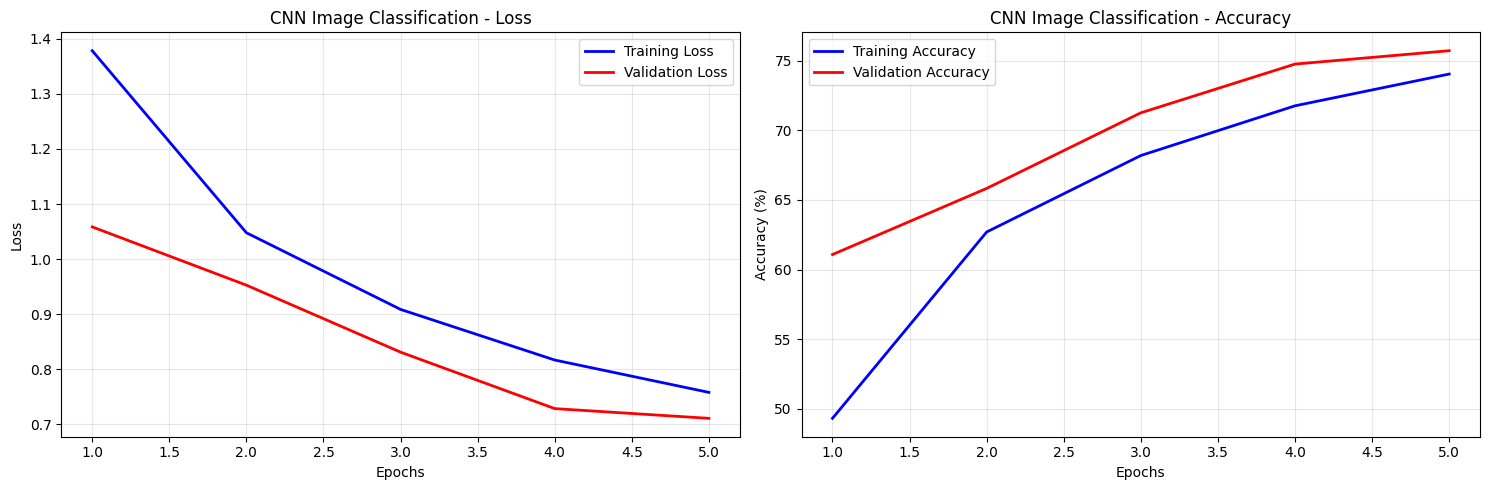


CNN Classification Report:
              precision    recall  f1-score   support

       plane       0.76      0.82      0.78      1000
         car       0.86      0.88      0.87      1000
        bird       0.56      0.78      0.65      1000
         cat       0.62      0.56      0.59      1000
        deer       0.75      0.71      0.73      1000
         dog       0.69      0.64      0.67      1000
        frog       0.82      0.82      0.82      1000
       horse       0.85      0.77      0.81      1000
        ship       0.82      0.91      0.86      1000
       truck       0.95      0.70      0.81      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



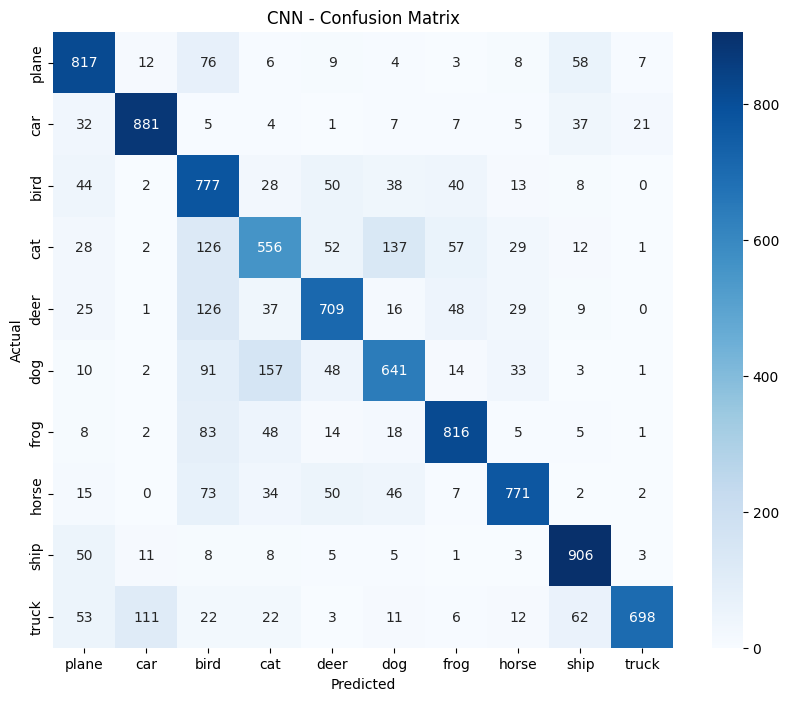

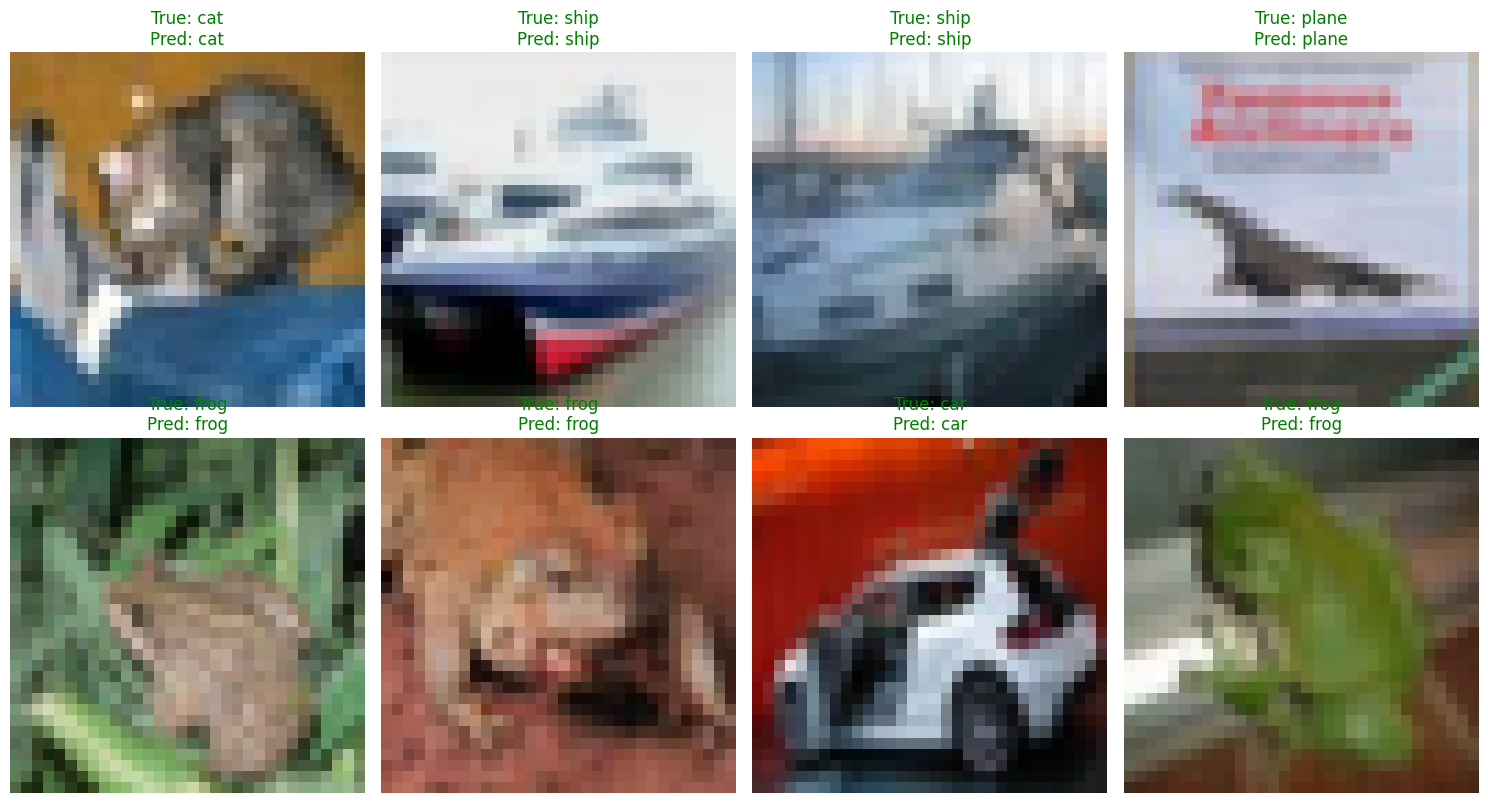


📝 PART 2: TEXT CLASSIFICATION (SENTIMENT ANALYSIS)
--------------------------------------------------
Preparing text dataset...
Training samples: 800
Testing samples: 200
Vocabulary size: 110
Creating LSTM model...
LSTM Model Parameters: 658,362

Training LSTM model...
Epoch 1: Train Loss: 0.6967, Train Acc: 48.12%, Test Loss: 0.6927, Test Acc: 50.00%
Epoch 2: Train Loss: 0.6945, Train Acc: 49.75%, Test Loss: 0.6914, Test Acc: 50.00%
Epoch 3: Train Loss: 0.6941, Train Acc: 49.00%, Test Loss: 0.6930, Test Acc: 50.00%
Epoch 4: Train Loss: 0.6948, Train Acc: 48.38%, Test Loss: 0.6910, Test Acc: 50.00%
Epoch 5: Train Loss: 0.6941, Train Acc: 49.00%, Test Loss: 0.6939, Test Acc: 50.00%
Epoch 6: Train Loss: 0.6934, Train Acc: 49.50%, Test Loss: 0.6927, Test Acc: 50.00%
Epoch 7: Train Loss: 0.6933, Train Acc: 51.50%, Test Loss: 0.6945, Test Acc: 50.00%
Epoch 8: Train Loss: 0.6939, Train Acc: 48.38%, Test Loss: 0.6921, Test Acc: 50.00%
Epoch 9: Train Loss: 0.6944, Train Acc: 47.75%, Test Loss

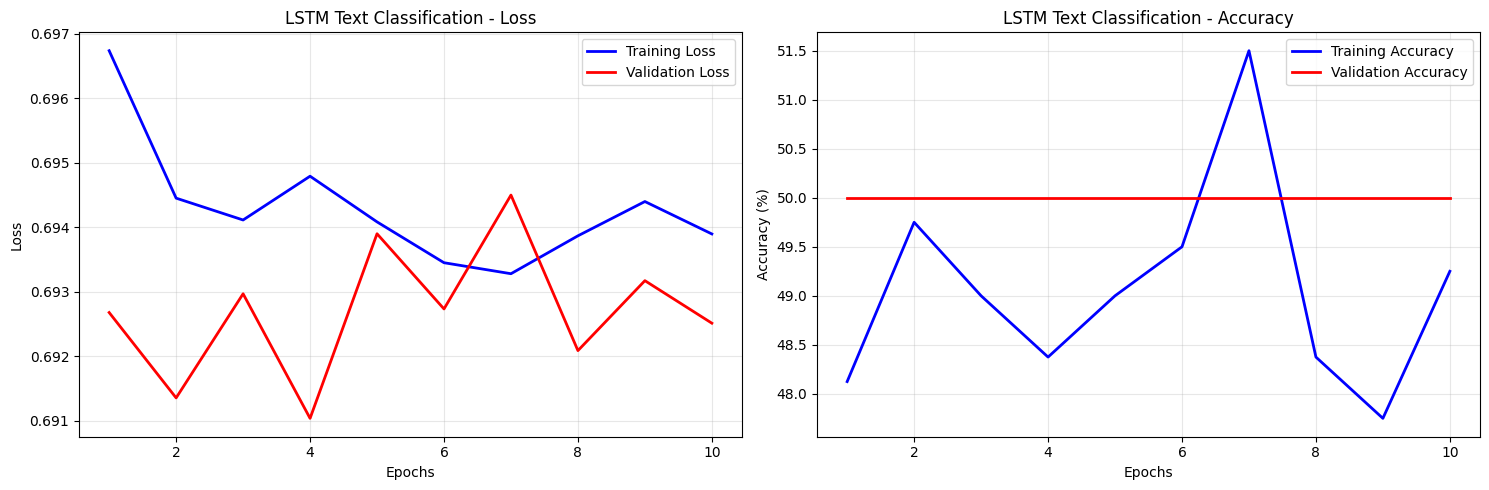


LSTM Text Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       100
    Positive       0.50      1.00      0.67       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



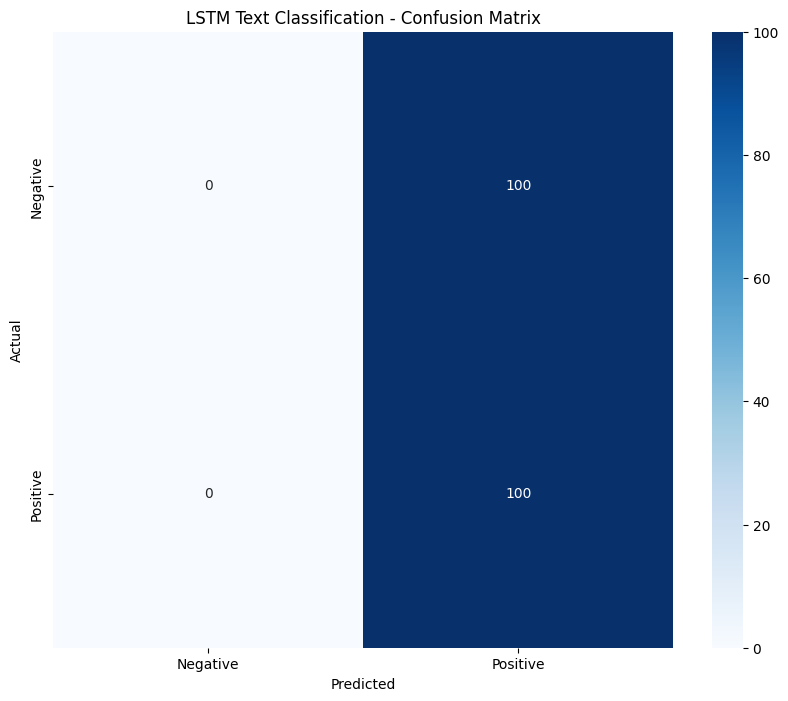


📊 PROJECT SUMMARY
CNN Final Test Accuracy: 75.72%
LSTM Final Test Accuracy: 50.00%
CNN Model Size: 981,130 parameters
LSTM Model Size: 658,362 parameters


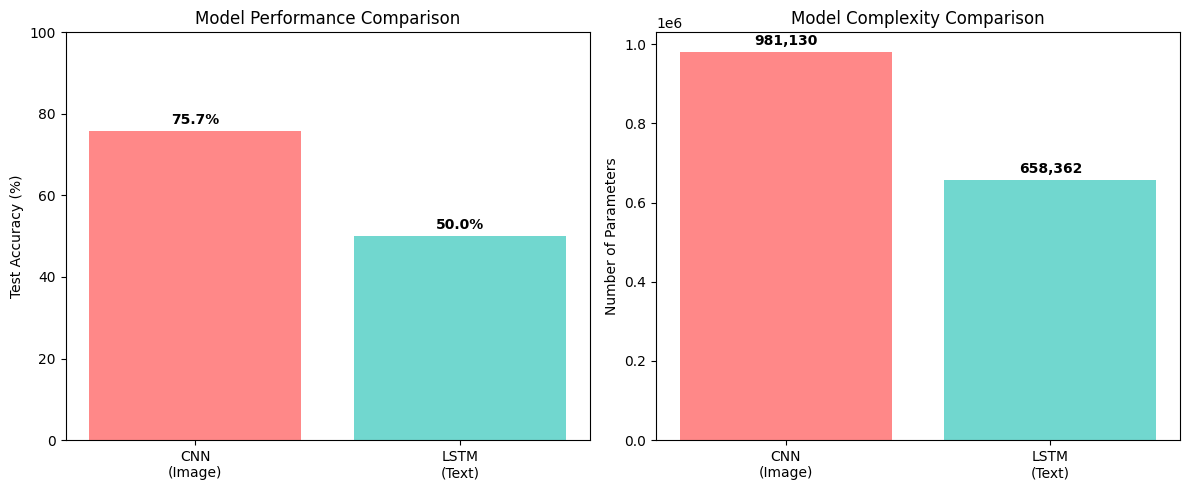


✅ Deep Learning Project Completed Successfully!
Models trained, evaluated, and visualized.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ============================================================================
# IMAGE CLASSIFICATION MODEL - CNN for CIFAR-10
# ============================================================================

class CNNModel(nn.Module):
    """Convolutional Neural Network for image classification"""

    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Dropout layers
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, num_classes)

        # Batch normalization
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)

    def forward(self, x):
        # First conv block
        x = self.pool(F.relu(self.bn1(self.conv1(x))))

        # Second conv block
        x = self.pool(F.relu(self.bn2(self.conv2(x))))

        # Third conv block
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        # Fourth conv block
        x = self.pool(F.relu(self.bn4(self.conv4(x))))

        # Flatten
        x = x.view(-1, 256 * 2 * 2)

        # Fully connected layers
        x = self.dropout1(x)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

# ============================================================================
# NATURAL LANGUAGE PROCESSING MODEL - LSTM for Text Classification
# ============================================================================

class LSTMTextClassifier(nn.Module):
    """LSTM Neural Network for text classification"""

    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, num_layers=2, num_classes=2, dropout=0.3):
        super(LSTMTextClassifier, self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # LSTM layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers,
                           batch_first=True, dropout=dropout, bidirectional=True)

        # Dropout
        self.dropout = nn.Dropout(dropout)

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_dim * 2, 64)  # *2 for bidirectional
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        # Embedding
        embedded = self.embedding(x)

        # LSTM
        lstm_out, (hidden, cell) = self.lstm(embedded)

        # Use the last output of LSTM
        output = lstm_out[:, -1, :]

        # Fully connected layers
        output = self.dropout(output)
        output = F.relu(self.fc1(output))
        output = self.dropout(output)
        output = self.fc2(output)

        return output

# ============================================================================
# DATA PREPARATION FUNCTIONS
# ============================================================================

def prepare_cifar10_data():
    """Prepare CIFAR-10 dataset"""

    # Data transformations
    transform_train = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

    # Load datasets
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform_train)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                         download=True, transform=transform_test)

    # Create data loaders
    trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
    testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

    # Class names
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes

def prepare_text_data():
    """Prepare synthetic text data for sentiment analysis"""

    # Create synthetic text data
    positive_texts = [
        "I love this movie, it's absolutely fantastic and amazing",
        "This is the best product I've ever bought, highly recommended",
        "Excellent service, very happy with the experience",
        "Outstanding quality, exceeded my expectations completely",
        "Wonderful experience, would definitely come back again",
        "Great job, really impressed with the results",
        "Perfect solution, exactly what I was looking for",
        "Amazing staff, very helpful and professional service",
        "Brilliant idea, innovative and well executed perfectly",
        "Fantastic value, worth every penny spent on it"
    ] * 50  # Repeat to create more samples

    negative_texts = [
        "Terrible quality, completely disappointed with this purchase",
        "Worst experience ever, would not recommend to anyone",
        "Poor service, very unprofessional and rude staff",
        "Awful product, broke immediately after first use",
        "Horrible experience, wasted my time and money",
        "Bad quality, not worth the price at all",
        "Disappointing results, did not meet basic expectations",
        "Unacceptable service, very poor customer support",
        "Defective product, multiple issues right from start",
        "Regrettable purchase, should have chosen something else"
    ] * 50  # Repeat to create more samples

    # Combine texts and labels
    texts = positive_texts + negative_texts
    labels = [1] * len(positive_texts) + [0] * len(negative_texts)

    return texts, labels

def preprocess_text(texts, max_length=100):
    """Preprocess text data for LSTM model"""

    # Basic text preprocessing
    processed_texts = []
    for text in texts:
        # Convert to lowercase and remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
        processed_texts.append(text)

    # Create vocabulary
    all_words = ' '.join(processed_texts).split()
    word_counts = Counter(all_words)
    vocab = ['<PAD>', '<UNK>'] + [word for word, count in word_counts.most_common(5000)]
    word_to_idx = {word: idx for idx, word in enumerate(vocab)}

    # Convert texts to sequences
    sequences = []
    for text in processed_texts:
        sequence = [word_to_idx.get(word, 1) for word in text.split()]  # 1 is <UNK>

        # Pad or truncate
        if len(sequence) < max_length:
            sequence.extend([0] * (max_length - len(sequence)))  # 0 is <PAD>
        else:
            sequence = sequence[:max_length]

        sequences.append(sequence)

    return torch.tensor(sequences), len(vocab)

# ============================================================================
# TRAINING FUNCTIONS
# ============================================================================

def train_cnn_model(model, trainloader, testloader, epochs=10):
    """Train CNN model for image classification"""

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []

    model.to(device)

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        pbar = tqdm(trainloader, desc=f'Epoch {epoch+1}/{epochs}')
        for batch_idx, (data, target) in enumerate(pbar):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

            pbar.set_postfix({'Loss': f'{loss.item():.4f}',
                            'Acc': f'{100.*correct/total:.2f}%'})

        train_loss = running_loss / len(trainloader)
        train_acc = 100. * correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Testing phase
        model.eval()
        test_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for data, target in testloader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += criterion(output, target).item()
                _, predicted = output.max(1)
                total += target.size(0)
                correct += predicted.eq(target).sum().item()

        test_loss /= len(testloader)
        test_acc = 100. * correct / total
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        scheduler.step()

        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
              f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

    return train_losses, train_accuracies, test_losses, test_accuracies

def train_lstm_model(model, X_train, y_train, X_test, y_test, epochs=15):
    """Train LSTM model for text classification"""

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Create data loaders
    train_dataset = TensorDataset(X_train, torch.tensor(y_train, dtype=torch.long))
    test_dataset = TensorDataset(X_test, torch.tensor(y_test, dtype=torch.long))
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []

    model.to(device)

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Testing phase
        model.eval()
        test_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += criterion(output, target).item()
                _, predicted = output.max(1)
                total += target.size(0)
                correct += predicted.eq(target).sum().item()

        test_loss /= len(test_loader)
        test_acc = 100. * correct / total
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
              f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

    return train_losses, train_accuracies, test_losses, test_accuracies

# ============================================================================
# VISUALIZATION FUNCTIONS
# ============================================================================

def plot_training_history(train_losses, train_accuracies, test_losses, test_accuracies, title):
    """Plot training history"""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Loss plot
    epochs = range(1, len(train_losses) + 1)
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2)
    ax1.plot(epochs, test_losses, 'r-', label='Validation Loss', linewidth=2)
    ax1.set_title(f'{title} - Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Accuracy plot
    ax2.plot(epochs, train_accuracies, 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(epochs, test_accuracies, 'r-', label='Validation Accuracy', linewidth=2)
    ax2.set_title(f'{title} - Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes, title):
    """Plot confusion matrix"""

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return cm

def evaluate_model(model, testloader, classes, model_name):
    """Evaluate model and generate predictions"""

    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data, target in testloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(target.cpu().numpy())

    # Classification report
    print(f"\n{model_name} Classification Report:")
    print("=" * 50)
    print(classification_report(all_labels, all_preds, target_names=classes))

    # Confusion matrix
    plot_confusion_matrix(all_labels, all_preds, classes, model_name)

    return all_labels, all_preds

def visualize_sample_predictions(model, testloader, classes, num_samples=8):
    """Visualize sample predictions"""

    model.eval()
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    # Plot images with predictions
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()

    for i in range(num_samples):
        img = images[i].cpu()
        # Denormalize
        img = img * torch.tensor([0.2023, 0.1994, 0.2010]).view(3, 1, 1) + \
              torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
        img = torch.clamp(img, 0, 1)

        axes[i].imshow(np.transpose(img, (1, 2, 0)))
        axes[i].set_title(f'True: {classes[labels[i]]}\nPred: {classes[predicted[i]]}',
                         color='green' if labels[i] == predicted[i] else 'red')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Main function to run the deep learning project"""

    print("🚀 DEEP LEARNING PROJECT - CNN & NLP MODELS")
    print("=" * 60)

    # ========================================
    # PART 1: IMAGE CLASSIFICATION WITH CNN
    # ========================================

    print("\n📸 PART 1: IMAGE CLASSIFICATION (CIFAR-10)")
    print("-" * 40)

    # Prepare data
    print("Preparing CIFAR-10 dataset...")
    trainloader, testloader, classes = prepare_cifar10_data()

    # Create and train CNN model
    print("Creating CNN model...")
    cnn_model = CNNModel(num_classes=10)
    print(f"CNN Model Parameters: {sum(p.numel() for p in cnn_model.parameters()):,}")

    print("\nTraining CNN model...")
    cnn_train_losses, cnn_train_acc, cnn_test_losses, cnn_test_acc = train_cnn_model(
        cnn_model, trainloader, testloader, epochs=5  # Reduced for demo
    )

    # Visualize CNN results
    plot_training_history(cnn_train_losses, cnn_train_acc, cnn_test_losses,
                         cnn_test_acc, "CNN Image Classification")

    # Evaluate CNN
    cnn_labels, cnn_preds = evaluate_model(cnn_model, testloader, classes, "CNN")

    # Visualize sample predictions
    visualize_sample_predictions(cnn_model, testloader, classes)

    # ========================================
    # PART 2: TEXT CLASSIFICATION WITH LSTM
    # ========================================

    print("\n📝 PART 2: TEXT CLASSIFICATION (SENTIMENT ANALYSIS)")
    print("-" * 50)

    # Prepare text data
    print("Preparing text dataset...")
    texts, labels = prepare_text_data()

    # Preprocess text
    sequences, vocab_size = preprocess_text(texts)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        sequences, labels, test_size=0.2, random_state=42, stratify=labels
    )

    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")
    print(f"Vocabulary size: {vocab_size}")

    # Create and train LSTM model
    print("Creating LSTM model...")
    lstm_model = LSTMTextClassifier(vocab_size=vocab_size, num_classes=2)
    print(f"LSTM Model Parameters: {sum(p.numel() for p in lstm_model.parameters()):,}")

    print("\nTraining LSTM model...")
    lstm_train_losses, lstm_train_acc, lstm_test_losses, lstm_test_acc = train_lstm_model(
        lstm_model, X_train, y_train, X_test, y_test, epochs=10
    )

    # Visualize LSTM results
    plot_training_history(lstm_train_losses, lstm_train_acc, lstm_test_losses,
                         lstm_test_acc, "LSTM Text Classification")

    # Evaluate LSTM
    lstm_model.eval()
    with torch.no_grad():
        X_test_device = X_test.to(device)
        outputs = lstm_model(X_test_device)
        _, lstm_preds = torch.max(outputs, 1)
        lstm_preds = lstm_preds.cpu().numpy()

    # Classification report for LSTM
    sentiment_classes = ['Negative', 'Positive']
    print(f"\nLSTM Text Classification Report:")
    print("=" * 50)
    print(classification_report(y_test, lstm_preds, target_names=sentiment_classes))

    # Confusion matrix for LSTM
    plot_confusion_matrix(y_test, lstm_preds, sentiment_classes, "LSTM Text Classification")

    # ========================================
    # SUMMARY STATISTICS
    # ========================================

    print("\n📊 PROJECT SUMMARY")
    print("=" * 30)
    print(f"CNN Final Test Accuracy: {cnn_test_acc[-1]:.2f}%")
    print(f"LSTM Final Test Accuracy: {lstm_test_acc[-1]:.2f}%")
    print(f"CNN Model Size: {sum(p.numel() for p in cnn_model.parameters()):,} parameters")
    print(f"LSTM Model Size: {sum(p.numel() for p in lstm_model.parameters()):,} parameters")

    # Model comparison visualization
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    models = ['CNN\n(Image)', 'LSTM\n(Text)']
    accuracies = [cnn_test_acc[-1], lstm_test_acc[-1]]
    colors = ['#FF6B6B', '#4ECDC4']

    bars = plt.bar(models, accuracies, color=colors, alpha=0.8)
    plt.title('Model Performance Comparison')
    plt.ylabel('Test Accuracy (%)')
    plt.ylim(0, 100)

    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.subplot(1, 2, 2)
    param_counts = [sum(p.numel() for p in cnn_model.parameters()),
                   sum(p.numel() for p in lstm_model.parameters())]

    bars = plt.bar(models, param_counts, color=colors, alpha=0.8)
    plt.title('Model Complexity Comparison')
    plt.ylabel('Number of Parameters')

    # Add value labels on bars
    for bar, count in zip(bars, param_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(param_counts)*0.01,
                f'{count:,}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\n✅ Deep Learning Project Completed Successfully!")
    print("Models trained, evaluated, and visualized.")

if __name__ == "__main__":
    main()